In [61]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
train = pd.read_csv("/kaggle/input/playground-series-s5e2/train.csv")
test = pd.read_csv("/kaggle/input/playground-series-s5e2/test.csv")
extra_train = pd.read_csv("/kaggle/input/playground-series-s5e2/training_extra.csv")

In [63]:
# def display_head(*data):
#     for df in data:
#         print(df.head(), "\n")
# display_head(train,test)

train.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312


In [64]:
extra_train.head()

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,500000,Under Armour,Canvas,Small,10.0,Yes,Yes,Tote,Blue,23.882052,114.11068
1,500001,Puma,Polyester,Small,4.0,No,Yes,Backpack,Green,11.869095,129.74972
2,500002,Jansport,Polyester,Small,8.0,Yes,Yes,Tote,Red,8.092302,21.37370
3,500003,Nike,Nylon,Large,7.0,No,No,Messenger,Pink,7.719581,48.09209
4,500004,Nike,Leather,Large,9.0,No,Yes,Tote,Green,22.741826,77.32461


In [65]:
train = pd.concat([train, extra_train], ignore_index=True)
train.reset_index(drop=True, inplace=True)
train

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...,...
3994313,4194313,Nike,Canvas,NaN,3.0,Yes,Yes,Messenger,Blue,28.098120,104.74460
3994314,4194314,Puma,Leather,Small,10.0,Yes,Yes,Tote,Blue,17.379531,122.39043
3994315,4194315,Jansport,Canvas,Large,10.0,No,No,Backpack,Red,17.037708,148.18470
3994316,4194316,Puma,Canvas,NaN,2.0,No,No,Backpack,Gray,28.783339,22.32269


In [66]:
train.shape

(3994318, 11)

In [67]:
train.describe()

,id,Compartments,Weight Capacity (kg),Price
count,3.994318e+06,3.994318e+06,3.992510e+06,3.994318e+06
mean,2.182137e+06,5.434740e+00,1.801042e+01,8.136217e+01
std,1.178058e+06,2.893043e+00,6.973969e+00,3.893868e+01
min,0.000000e+00,1.000000e+00,5.000000e+00,1.500000e+01
25%,1.198579e+06,3.000000e+00,1.206896e+01,4.747002e+01
50%,2.197158e+06,5.000000e+00,1.805436e+01,8.098495e+01
75%,3.195738e+06,8.000000e+00,2.398751e+01,1.148550e+02
max,4.194317e+06,1.000000e+01,3.000000e+01,1.500000e+02


In [68]:
print(train.columns)

Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')


In [69]:
#checking the number of rows and column present in the data

num_train_rows, num_train_columns = train.shape

num_test_rows, num_test_columns = test.shape

num_extra_rows, num_extra_columns = extra_train.shape

print("Training Data:")
print(f"Number of Rows: {num_train_rows}")
print(f"Number of Columns: {num_train_columns}\n")

print("Test Data:")
print(f"Number of Rows: {num_test_rows}")
print(f"Number of Columns: {num_test_columns}\n")

print("Extra Data:")
print(f"Number of Rows: {num_extra_rows}")
print(f"Number of Columns: {num_extra_columns}")

Training Data:
Number of Rows: 3994318
Number of Columns: 11

Test Data:
Number of Rows: 200000
Number of Columns: 10

Extra Data:
Number of Rows: 3694318
Number of Columns: 11


In [70]:
# Creating a table for missing values, unique values and data types of the features

missing_values_train = pd.DataFrame({'Feature': train.columns,
                              '[TRAIN] No. of Missing Values': train.isnull().sum().values,
                              '[TRAIN] % of Missing Values': ((train.isnull().sum().values)/len(train)*100)})

missing_values_test = pd.DataFrame({'Feature': test.columns,
                             '[TEST] No.of Missing Values': test.isnull().sum().values,
                             '[TEST] % of Missing Values': ((test.isnull().sum().values)/len(test)*100)})

missing_values_original = pd.DataFrame({'Feature': extra_train.columns,
                             '[ORIGINAL] No.of Missing Values': extra_train.isnull().sum().values,
                             '[ORIGINAL] % of Missing Values': ((extra_train.isnull().sum().values)/len(extra_train)*100)})

unique_values = pd.DataFrame({'Feature': train.columns,
                              'No. of Unique Values[FROM TRAIN]': train.nunique().values})
feature_types = pd.DataFrame({'Feature': train.columns,
                              'DataType': train.dtypes})

merged_df = pd.merge(missing_values_train, missing_values_test, on='Feature', how='left')
merged_df = pd.merge(merged_df, missing_values_original, on='Feature', how='left')
merged_df = pd.merge(merged_df, unique_values, on='Feature', how='left')
merged_df = pd.merge(merged_df, feature_types, on='Feature', how='left')

merged_df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Feature,[TRAIN] No. of Missing Values,[TRAIN] % of Missing Values,[TEST] No.of Missing Values,[TEST] % of Missing Values,[ORIGINAL] No.of Missing Values,[ORIGINAL] % of Missing Values,No. of Unique Values[FROM TRAIN],DataType
0,id,0,0.000000,0.0,0.0000,0,0.000000,3994318,int64
1,Brand,126758,3.173458,6227.0,3.1135,117053,3.168460,5,object
2,Material,110962,2.777996,5613.0,2.8065,102615,2.777644,4,object
3,Size,87785,2.197747,4381.0,2.1905,81190,2.197699,3,object
4,Compartments,0,0.000000,0.0,0.0000,0,0.000000,10,float64
5,Laptop Compartment,98533,2.466829,4962.0,2.4810,91089,2.465651,2,object
6,Waterproof,94324,2.361454,4811.0,2.4055,87274,2.362385,2,object
7,Style,104180,2.608205,5153.0,2.5765,96210,2.604270,3,object
8,Color,133617,3.345177,6785.0,3.3925,123667,3.347492,6,object
9,Weight Capacity (kg),1808,0.045264,77.0,0.0385,1670,0.045205,1920345,float64


In [71]:
# Frequency distribution of categorical variables
categorical_columns = ['Brand', 'Material', 'Size', 'Style', 'Color',
                       'Laptop Compartment', 'Waterproof']
for col in categorical_columns:
    print(f"\n{col} distribution:\n")
    print(train[col].value_counts())



Brand distribution:

Brand
Under Armour    801035
Adidas          797000
Nike            764407
Puma            755778
Jansport        749340
Name: count, dtype: int64

Material distribution:

Material
Polyester    1060882
Leather       976186
Nylon         942656
Canvas        903632
Name: count, dtype: int64

Size distribution:

Size
Medium    1354487
Large     1312295
Small     1239751
Name: count, dtype: int64

Style distribution:

Style
Messenger    1329677
Tote         1297942
Backpack     1262519
Name: count, dtype: int64

Color distribution:

Color
Pink     688257
Gray     666110
Blue     638485
Red      630215
Black    620610
Green    617024
Name: count, dtype: int64

Laptop Compartment distribution:

Laptop Compartment
Yes    1972937
No     1922848
Name: count, dtype: int64

Waterproof distribution:

Waterproof
Yes    1969205
No     1930789
Name: count, dtype: int64


In [72]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,3994318.0,2.182137e+06,1.178058e+06,0.0,1.198579e+06,2.197158e+06,3.195738e+06,4194317.0
Compartments,3994318.0,5.434740e+00,2.893043e+00,1.0,3.000000e+00,5.000000e+00,8.000000e+00,10.0
Weight Capacity (kg),3992510.0,1.801042e+01,6.973969e+00,5.0,1.206896e+01,1.805436e+01,2.398751e+01,30.0
Price,3994318.0,8.136217e+01,3.893868e+01,15.0,4.747002e+01,8.098495e+01,1.148550e+02,150.0


In [73]:
# Correlation matrix for numerical columns
corr = train[['Price', 'Weight Capacity (kg)']].corr()
print("\nCorrelation matrix:\n", corr)

"""Since the correlation is so low, Price and Weight Capacity (kg) are not highly correlated. 
There is a weak, almost negligible linear relationship between them."""


Correlation matrix:
                          Price  Weight Capacity (kg)
Price                 1.000000              0.017703
Weight Capacity (kg)  0.017703              1.000000


'Since the correlation is so low, Price and Weight Capacity (kg) are not highly correlated. \nThere is a weak, almost negligible linear relationship between them.'

In [74]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(1), object(7)
memory usage: 335.2+ MB


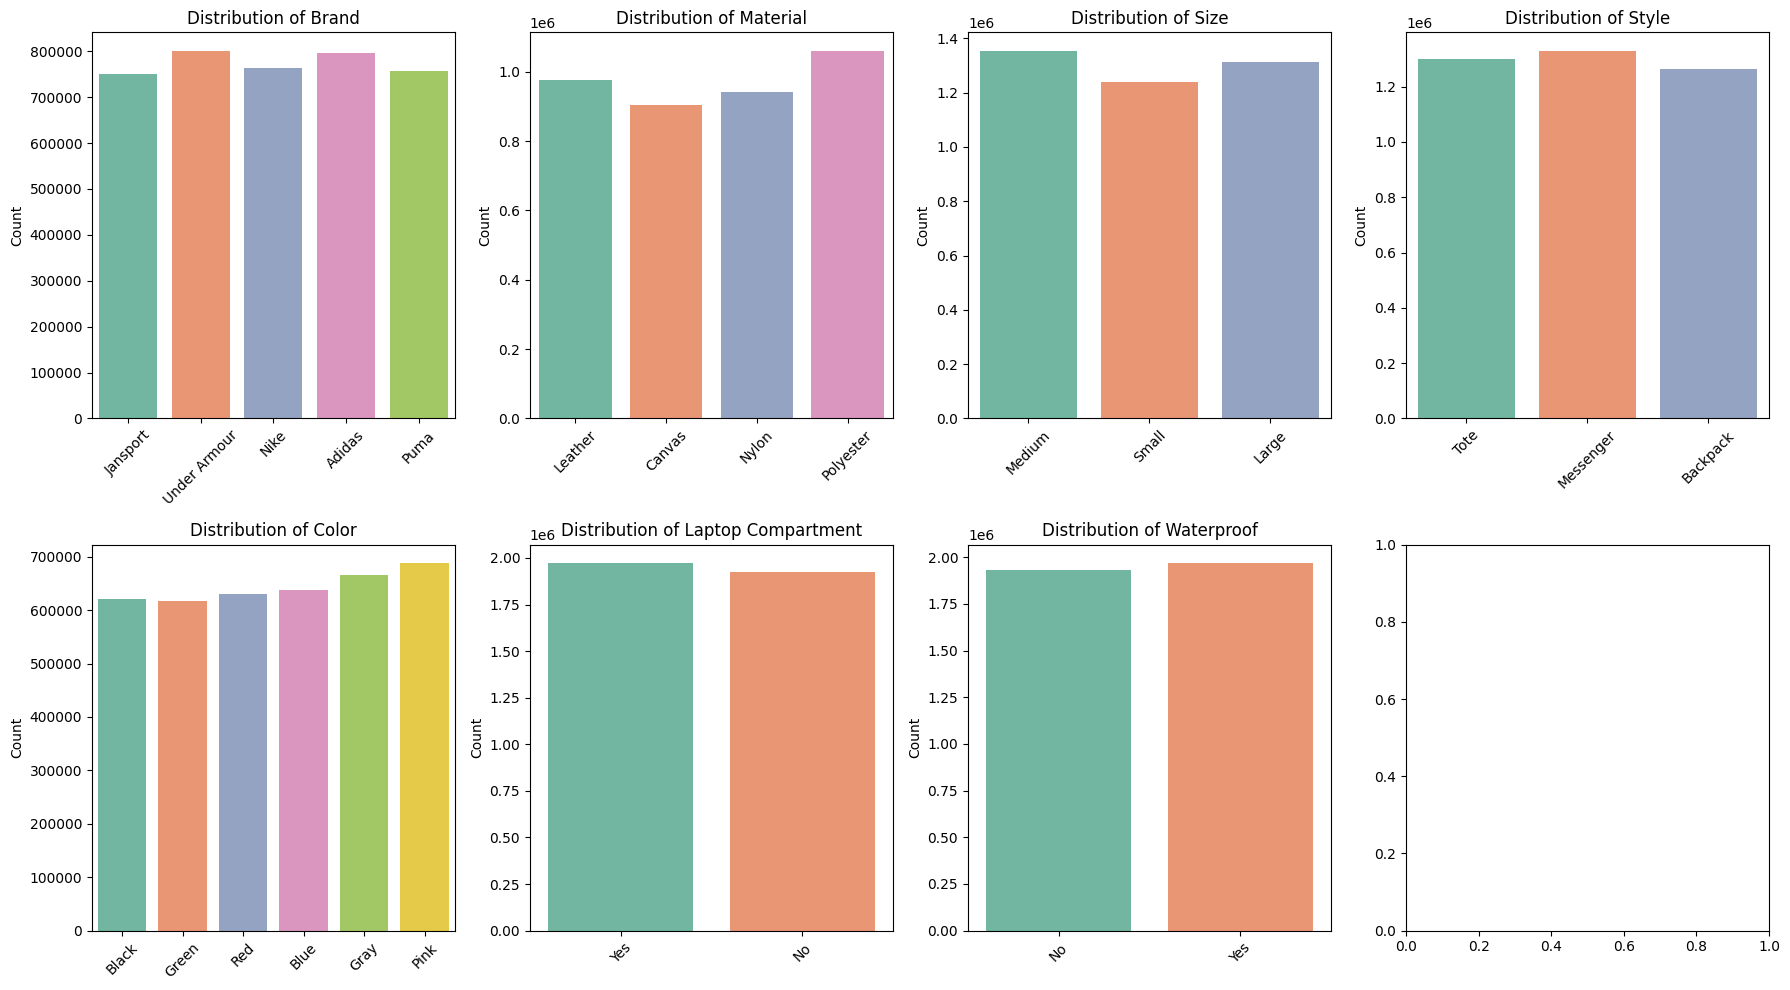

In [75]:
# Distributions of the categorical features
categorical_columns = ['Brand', 'Material', 'Size', 'Style', 'Color',
                       'Laptop Compartment', 'Waterproof']

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(18, 10))
axes = axes.flatten()

# Loop through each categorical column and plot
for i, col in enumerate(categorical_columns):
    sns.countplot(x=col, data=train, ax=axes[i], palette='Set2')
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()


<Axes: >

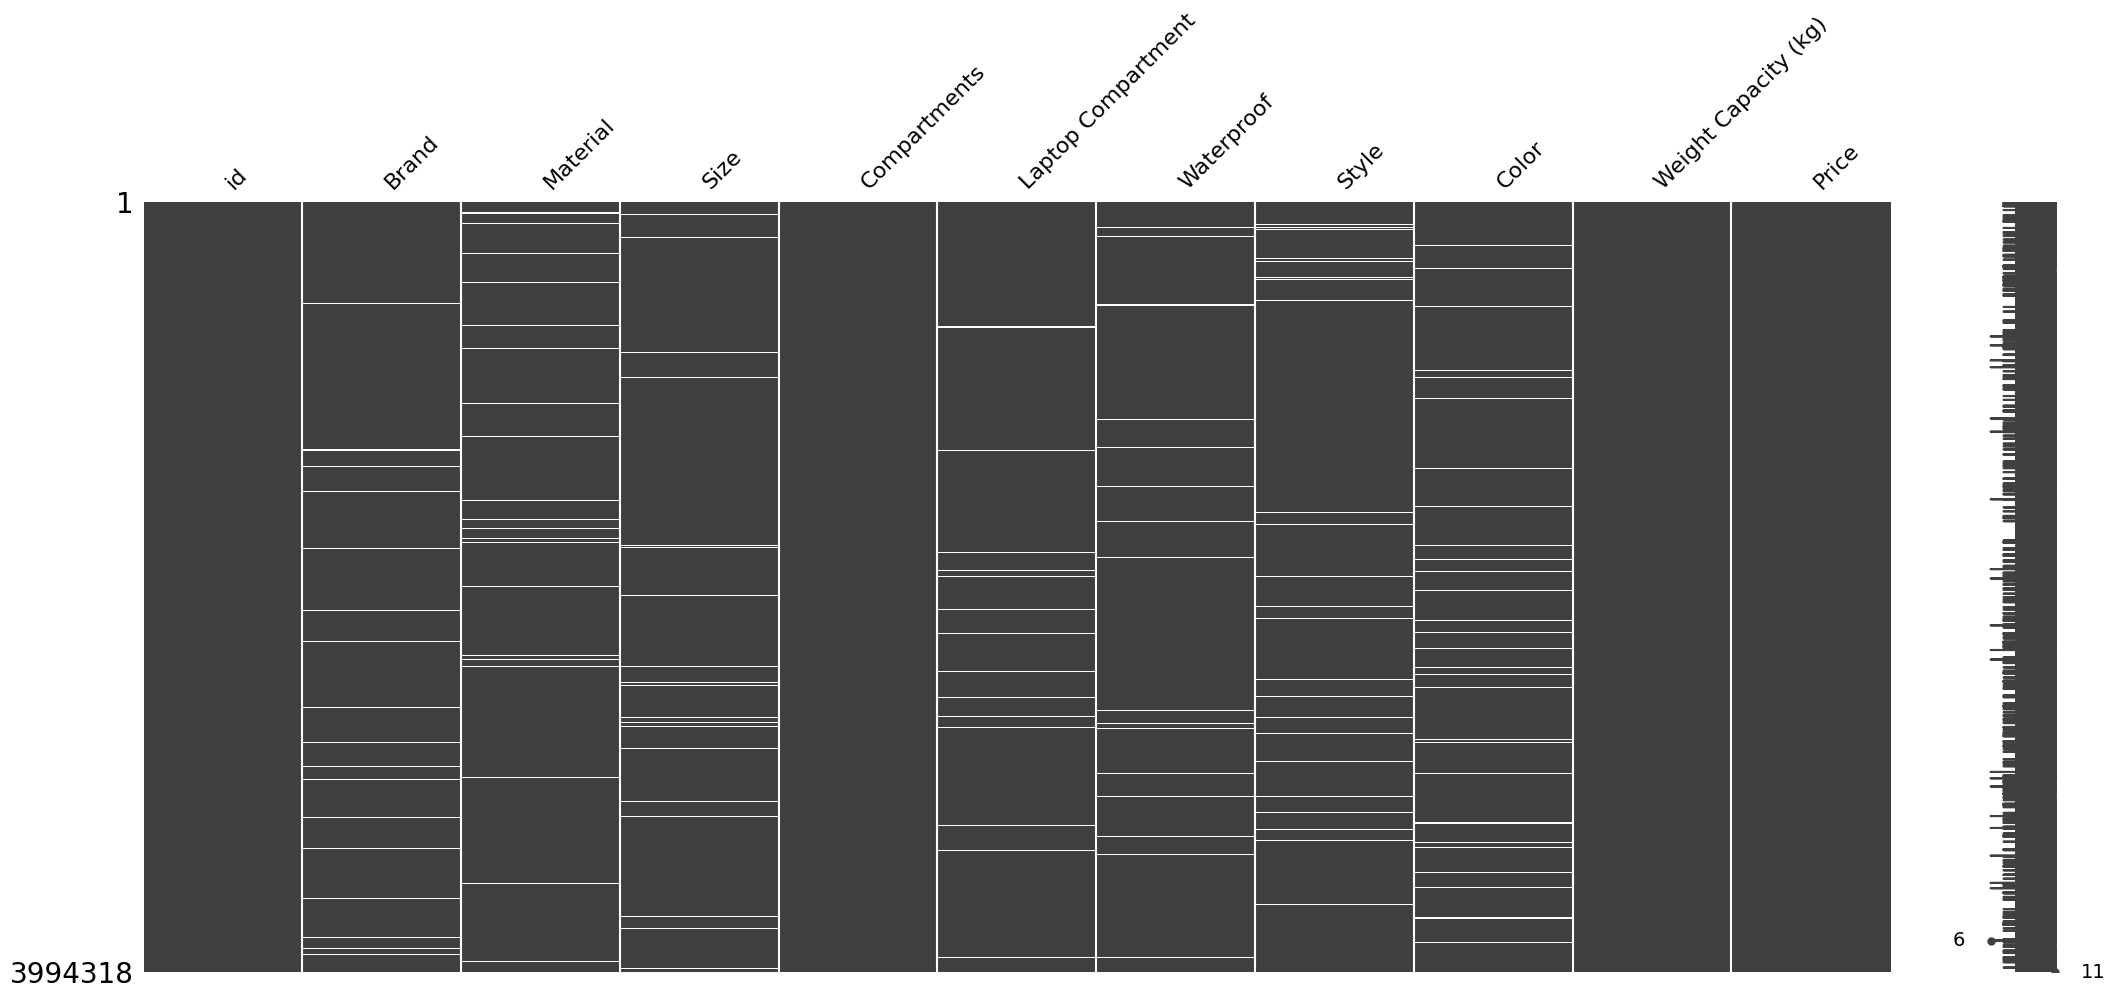

In [76]:
import missingno as msno
msno.matrix(train)  # Missing data visualization

In [77]:
# import pandas as pd
# from scipy.stats import chi2_contingency

# # Creating a missingness indicator
# train['missing_brand'] = train['Brand'].isna()

# # Check the relationship between missingness and another feature
# contingency_table = pd.crosstab(train['missing_brand'], train['Size'])
# chi2, p, _, _ = chi2_contingency(contingency_table)

# if p < 0.05:
#     print("Missingness is related to another variable, suggesting MAR or NMAR.")
# else:
#     print("Missingness is unrelated to the variable, suggesting MCAR.")


In [78]:
#Since all the plots are normally distributed lets fill the categorical values with mode
for col in categorical_columns:
    mode_value = train[col].mode()[0] #impute with most frwquent values
    train[col].fillna(mode_value, inplace=True)

<ipython-input-78-48c86af63edf>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(mode_value, inplace=True)


In [79]:
for col in categorical_columns:
    mode_value = train[col].mode()[0]  # Get the mode from train data
    train[col].fillna(mode_value, inplace=True)
    test[col].fillna(mode_value, inplace=True)  # Fill missing values in test using the same mode


<ipython-input-79-38e5ff18e2b0>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test[col].fillna(mode_value, inplace=True)  # Fill missing values in test using the same mode


In [80]:
test.isnull().sum()

id                       0
Brand                    0
Material                 0
Size                     0
Compartments             0
Laptop Compartment       0
Waterproof               0
Style                    0
Color                    0
Weight Capacity (kg)    77
dtype: int64

In [81]:
train.isnull().sum()

id                         0
Brand                      0
Material                   0
Size                       0
Compartments               0
Laptop Compartment         0
Waterproof                 0
Style                      0
Color                      0
Weight Capacity (kg)    1808
Price                      0
dtype: int64

/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


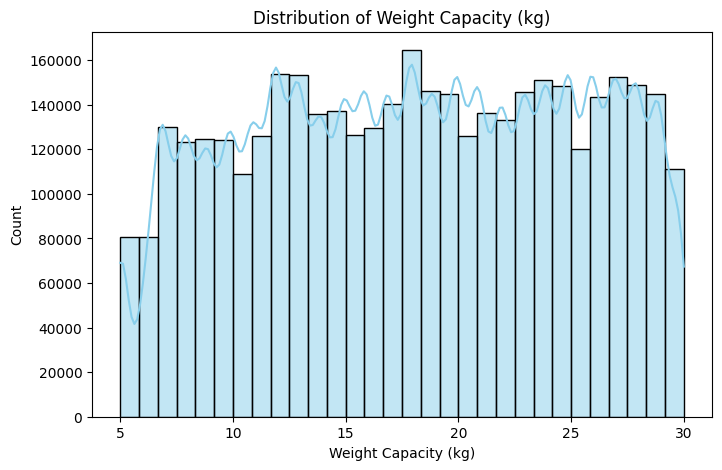

In [82]:
plt.figure(figsize=(8, 5))
sns.histplot(train['Weight Capacity (kg)'], bins=30, kde=True, color='skyblue')

plt.xlabel("Weight Capacity (kg)")
plt.ylabel("Count")
plt.title("Distribution of Weight Capacity (kg)")
plt.show()


In [83]:
numerical_columns = ['Weight Capacity (kg)'] 

for col in numerical_columns:
    mean_value = train[col].mean()  # Calculate mean from train data
    train[col].fillna(mean_value, inplace=True)
    test[col].fillna(mean_value, inplace=True)  # Apply same mean to test data

<ipython-input-83-11e8b7449417>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(mean_value, inplace=True)
<ipython-input-83-11e8b7449417>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [84]:
train.isna().sum()

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
Price                   0
dtype: int64

In [85]:
test.isna().sum()

id                      0
Brand                   0
Material                0
Size                    0
Compartments            0
Laptop Compartment      0
Waterproof              0
Style                   0
Color                   0
Weight Capacity (kg)    0
dtype: int64

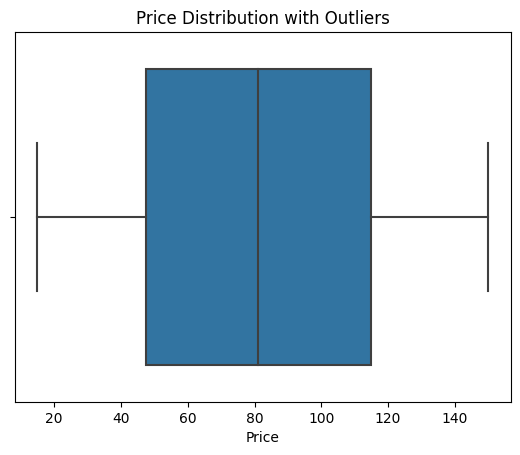

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot to visualize outliers in Price and Weight
sns.boxplot(x=train['Price'])
plt.title('Price Distribution with Outliers')
plt.show()

# sns.boxplot(x=train['Weight Capacity (kg)'])
# plt.title('Weight Distribution with Outliers')
# plt.show()


In [87]:
print(train.columns)


Index(['id', 'Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment',
       'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)', 'Price'],
      dtype='object')


In [88]:
train.head(10)

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
5,5,Nike,Canvas,Medium,10.0,No,Yes,Messenger,Black,7.241812,20.01553
6,6,Nike,Polyester,Large,3.0,No,No,Backpack,Green,6.828123,84.80500
7,7,Puma,Canvas,Small,1.0,Yes,Yes,Backpack,Blue,21.488864,27.15815
8,8,Under Armour,Polyester,Medium,8.0,Yes,No,Tote,Gray,10.207780,25.98652
9,9,Under Armour,Nylon,Medium,2.0,Yes,Yes,Messenger,Pink,15.895100,38.48741


In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(1), object(7)
memory usage: 335.2+ MB


In [90]:
# Convert 'Compartments' column to numeric, coercing any errors to NaN if needed
train['Compartments'] = pd.to_numeric(train['Compartments'], errors='coerce')


In [91]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(1), object(7)
memory usage: 335.2+ MB


In [92]:
# Separate numeric columns (int64, float64)
numeric_columns = train.select_dtypes(include=['int64', 'float64'])
# Drop the 'Price' column from numeric columns since it's the target
# numeric_columns = numeric_columns.drop(columns=['Price'])

# Separate categorical columns (object type)
categorical_columns = train.select_dtypes(include=['object'])

# Display the numeric and categorical columns
print("Numeric Columns:")
print(numeric_columns.columns)

print("\nCategorical Columns:")
print(categorical_columns.columns)

Numeric Columns:
Index(['id', 'Compartments', 'Weight Capacity (kg)', 'Price'], dtype='object')

Categorical Columns:
Index(['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof',
       'Style', 'Color'],
      dtype='object')


In [93]:
# Save the cleaned data to a new file
train.to_csv('cleaned_train_data.csv', index=False)


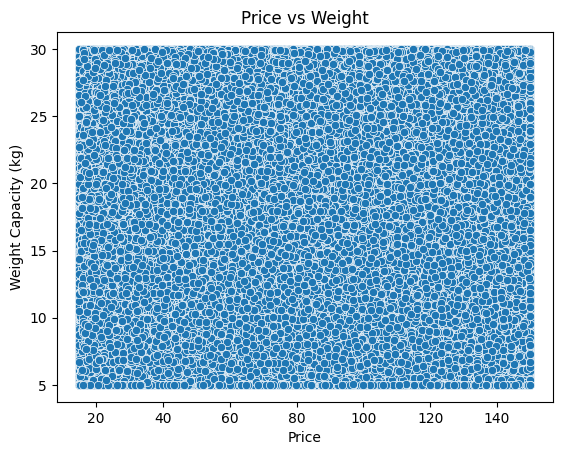

In [94]:
# Scatter plot of Price vs Weight
sns.scatterplot(x='Price', y='Weight Capacity (kg)', data=train)
plt.title('Price vs Weight')
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.10/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


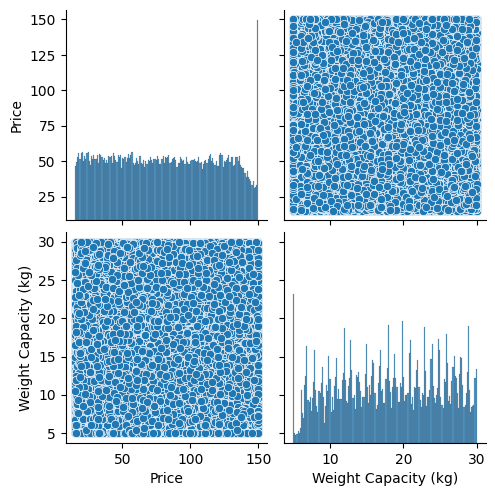

In [95]:
# Pair plot between numerical features
sns.pairplot(train[['Price', 'Weight Capacity (kg)']])
plt.show()


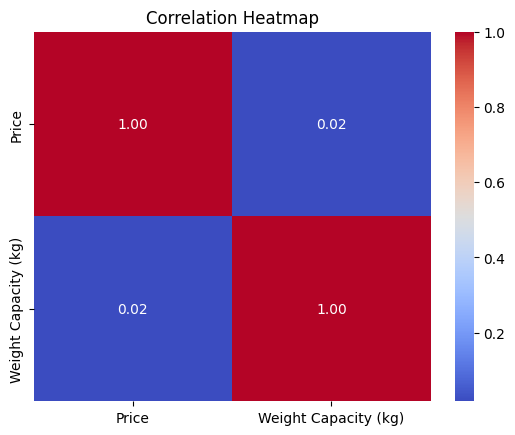

In [96]:
# Correlation heatmap
corr = train[['Price', 'Weight Capacity (kg)']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


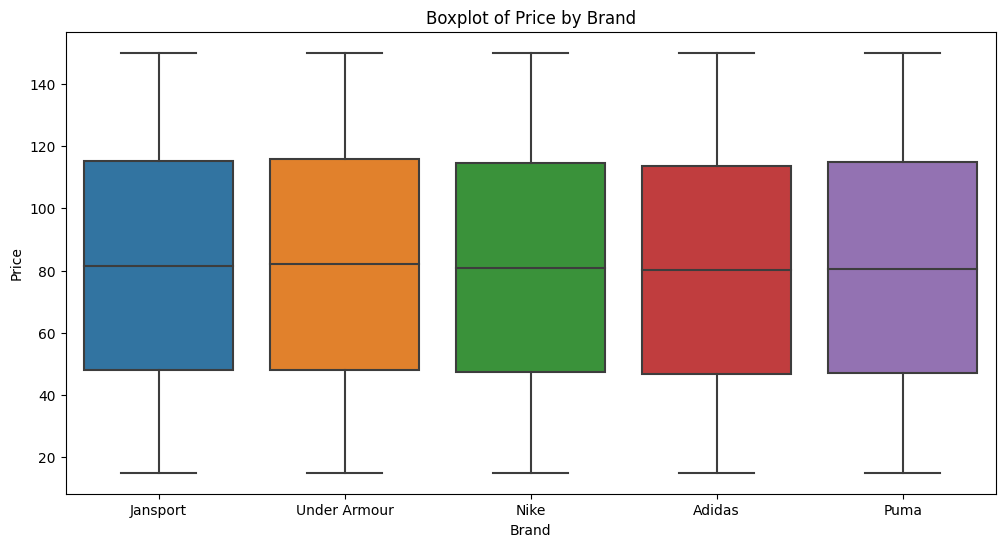

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a boxplot to show the distribution of 'Price' by 'Brand'
plt.figure(figsize=(12, 6))
sns.boxplot(x='Brand', y='Price', data=train)
plt.title("Boxplot of Price by Brand")
plt.show()


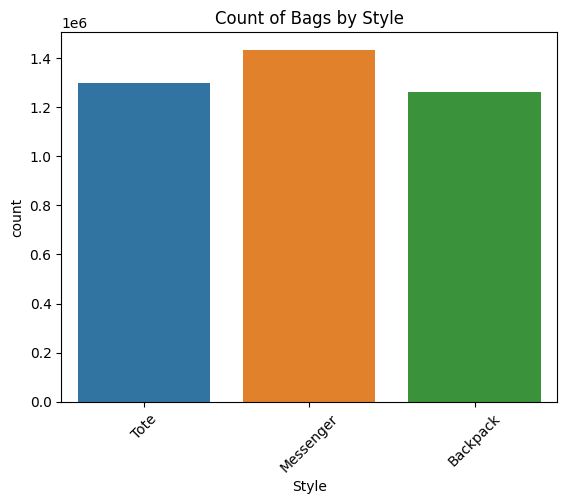

In [98]:
sns.countplot(x='Style', data=train)
plt.title('Count of Bags by Style')
plt.xticks(rotation=45)
plt.show()


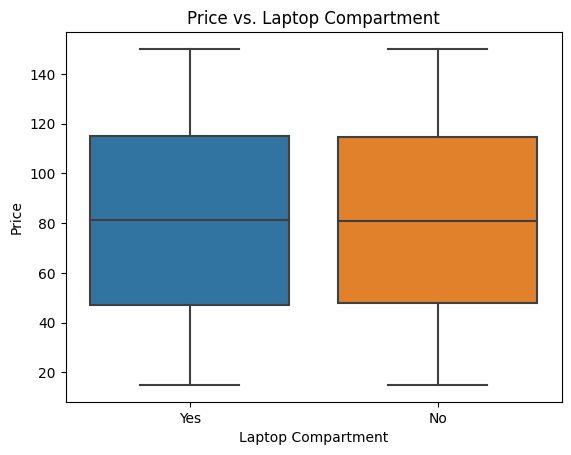

In [99]:
sns.boxplot(x='Laptop Compartment', y='Price', data=train)
plt.title('Price vs. Laptop Compartment')
plt.show()


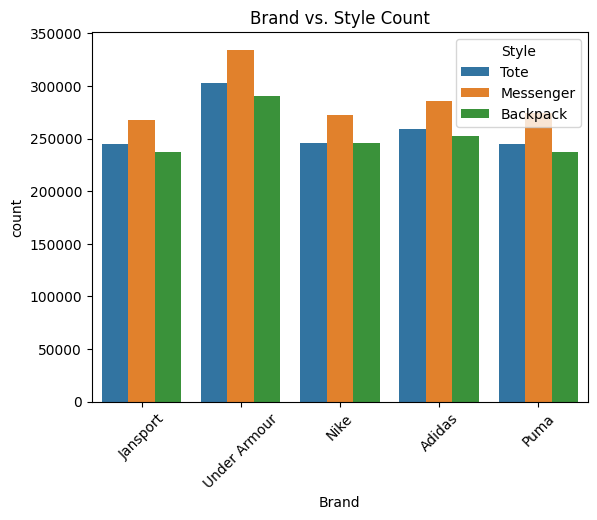

In [100]:
sns.countplot(x='Brand', hue='Style', data=train)
plt.title('Brand vs. Style Count')
plt.xticks(rotation=45)
plt.show()


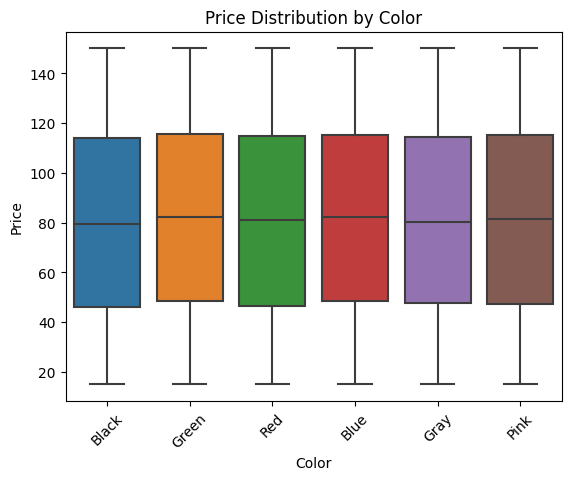

In [101]:
sns.boxplot(x='Color', y='Price', data=train)
plt.title('Price Distribution by Color')
plt.xticks(rotation=45)
plt.show()


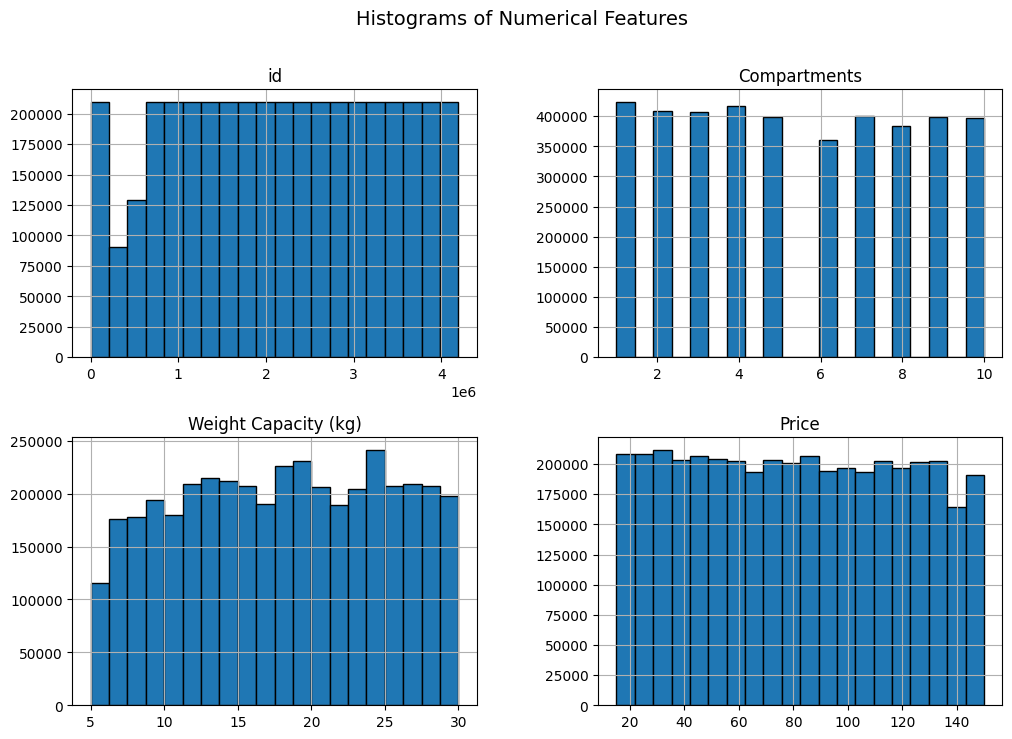

In [102]:
# Histogram for numerical features
train.hist(figsize=(12, 8), bins=20, edgecolor='black')
plt.suptitle("Histograms of Numerical Features", fontsize=14)
plt.show()

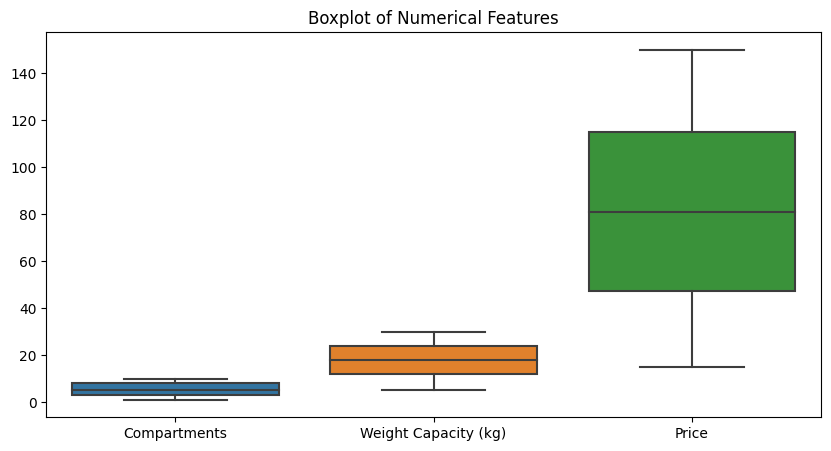

In [103]:
# Boxplot for numerical features
plt.figure(figsize=(10, 5))
sns.boxplot(data=train[['Compartments', 'Weight Capacity (kg)', 'Price']])
plt.title("Boxplot of Numerical Features")
plt.show()

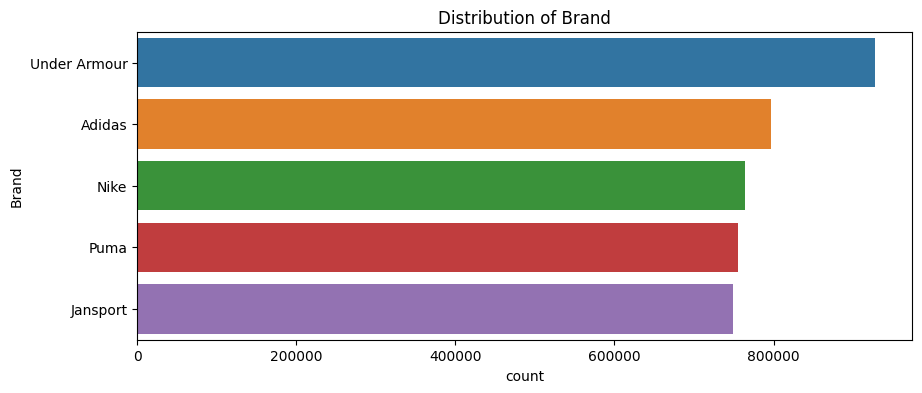

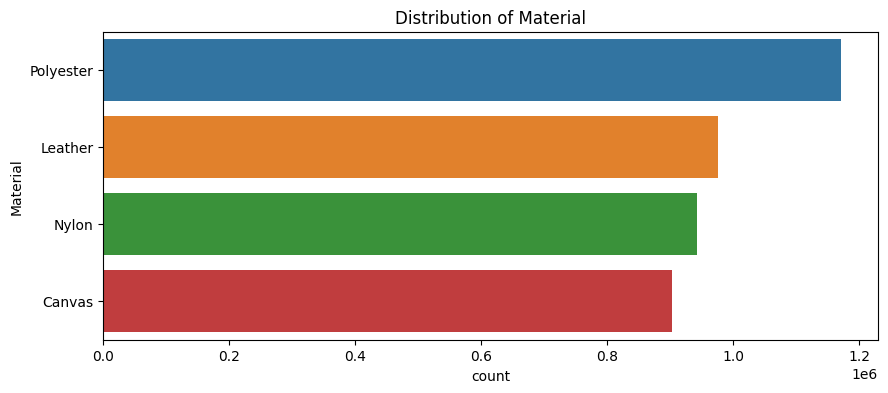

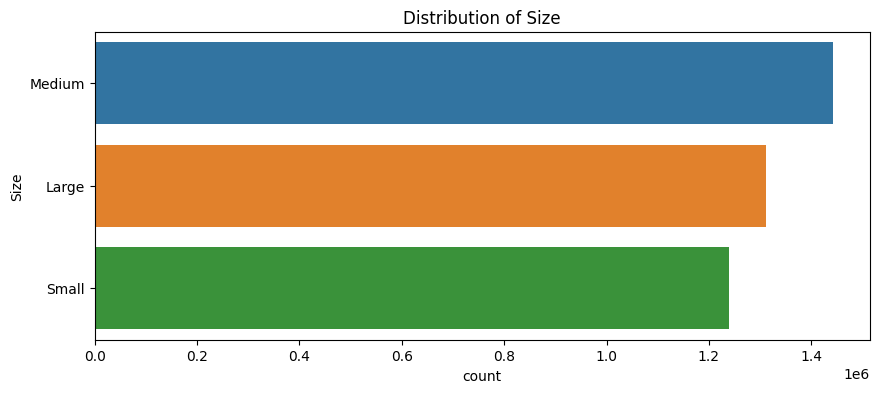

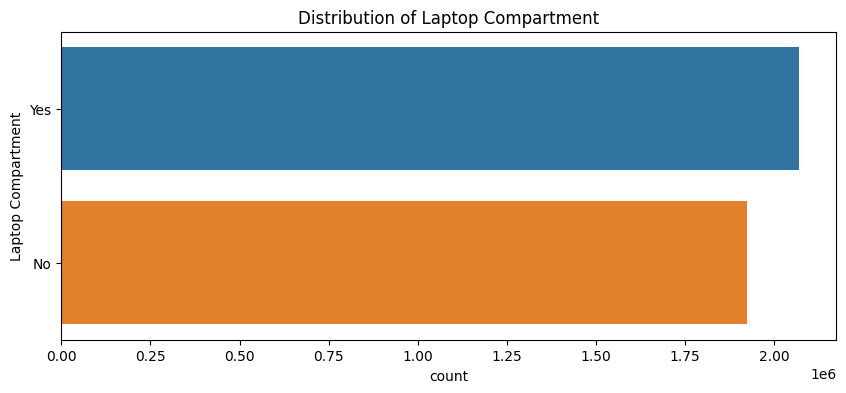

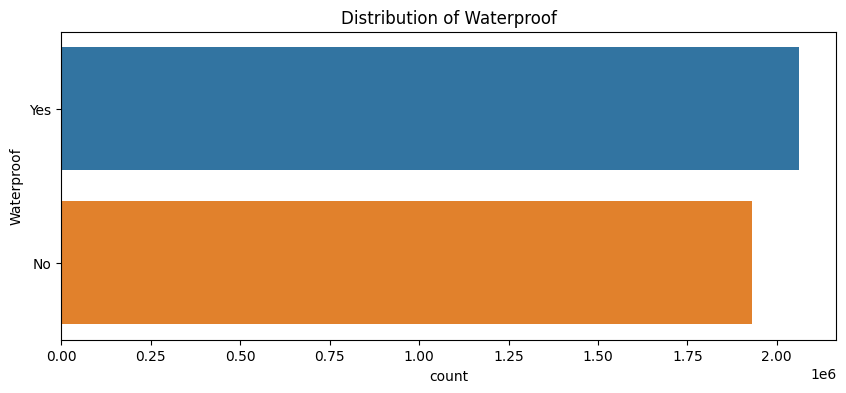

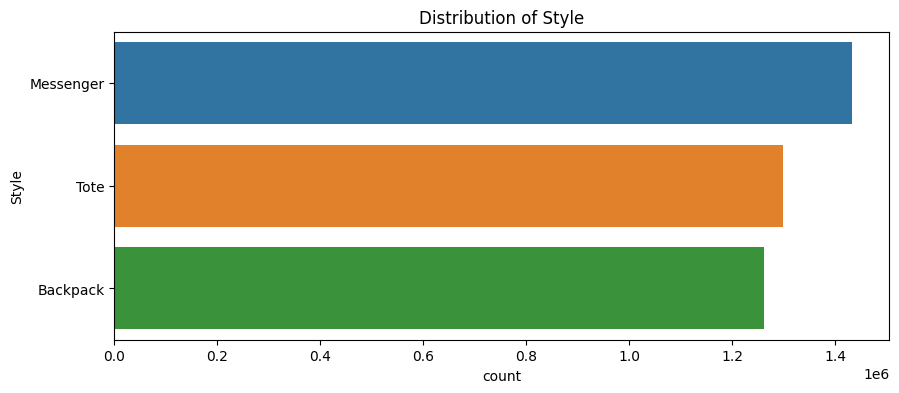

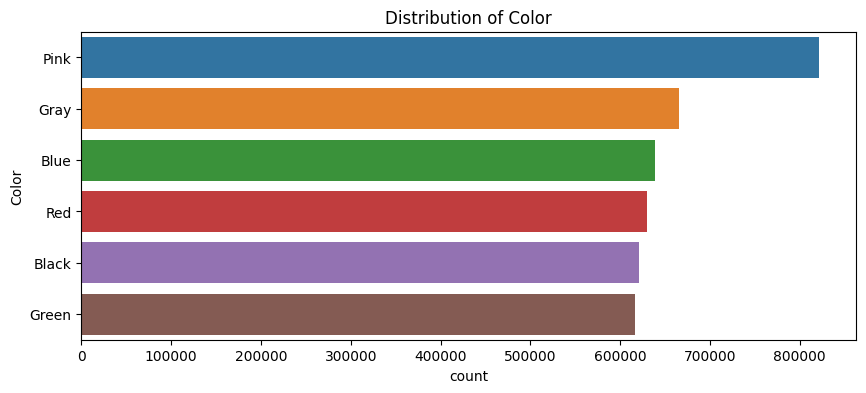

In [104]:
# Bar plots for categorical features
cat_features = ['Brand', 'Material', 'Size', 'Laptop Compartment', 'Waterproof', 'Style', 'Color']
for feature in cat_features:
    plt.figure(figsize=(10, 4))
    sns.countplot(y=train[feature], order=train[feature].value_counts().index)
    plt.title(f"Distribution of {feature}")
    plt.show()

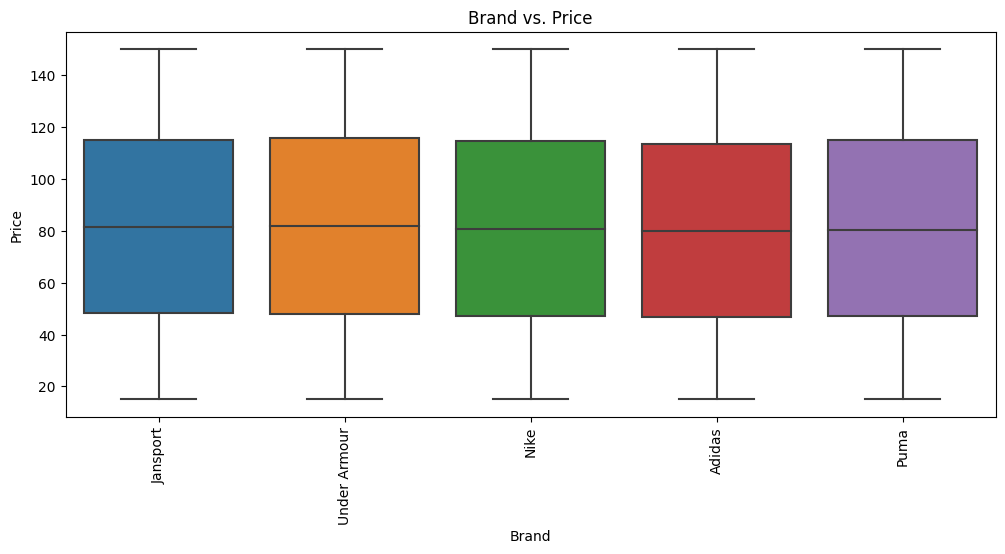

In [105]:
# Boxplot of Brand vs Price
plt.figure(figsize=(12, 5))
sns.boxplot(x=train['Brand'], y=train['Price'])
plt.xticks(rotation=90)
plt.title("Brand vs. Price")
plt.show()

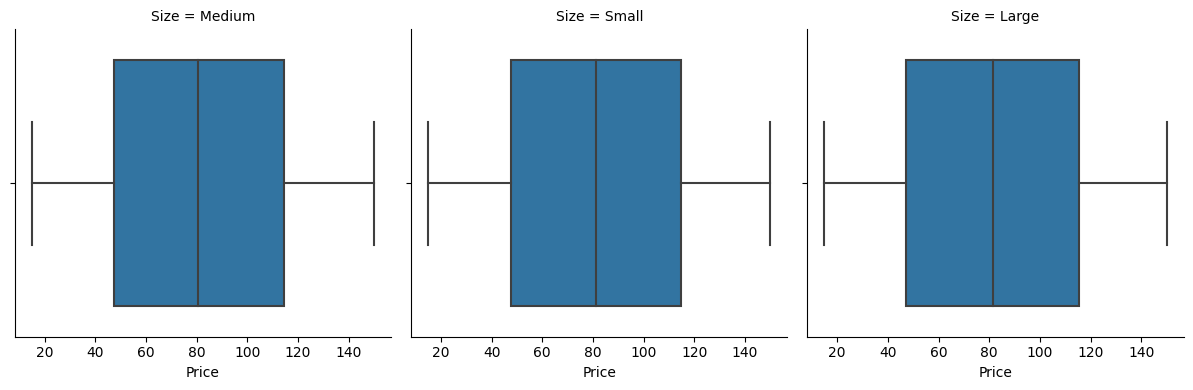

In [106]:
# Facet Grid for Size vs Price
facet = sns.FacetGrid(train, col="Size", col_wrap=4, height=4)
facet.map(sns.boxplot, "Price", order=train['Size'].unique())
plt.show()

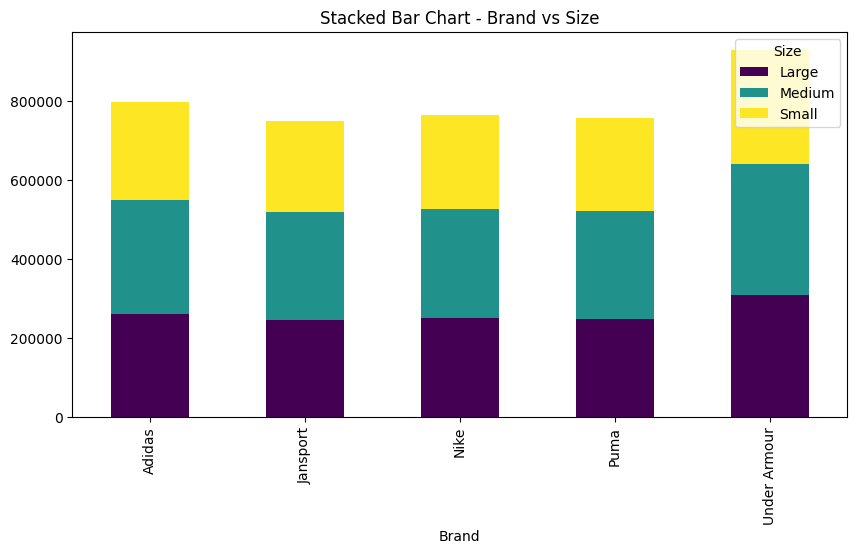

In [107]:
# Stacked Bar Chart for Categorical Features
cross_tab = pd.crosstab(train['Brand'], train['Size'])
cross_tab.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='viridis')
plt.title("Stacked Bar Chart - Brand vs Size")
plt.show()

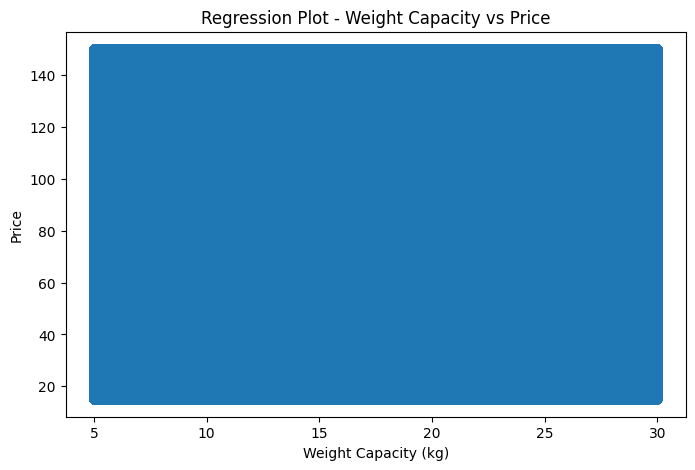

In [108]:
# Scatter Plot with Regression Line
plt.figure(figsize=(8, 5))
sns.regplot(x=train['Weight Capacity (kg)'], y=train['Price'])
plt.title("Regression Plot - Weight Capacity vs Price")
plt.show()

<ipython-input-109-9dccfa86fc50>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Brand'] = le.fit_transform(X['Brand'])
<ipython-input-109-9dccfa86fc50>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Material'] = le.fit_transform(X['Material'])
<ipython-input-109-9dccfa86fc50>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

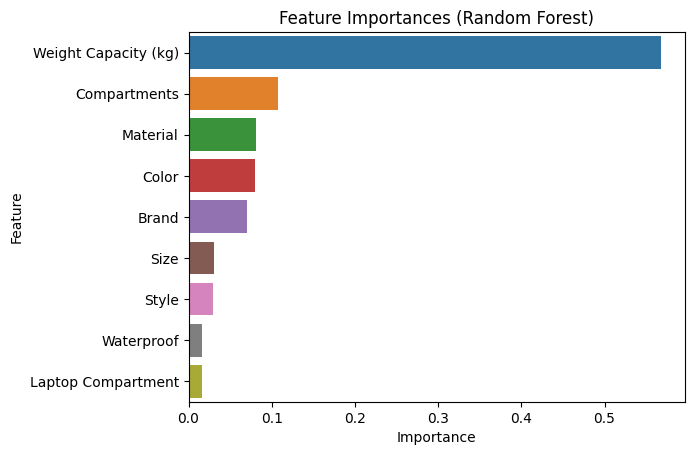

In [109]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train' is your DataFrame
# Define features and target variable
X = train[['Brand', 'Material', 'Size', 'Compartments', 'Laptop Compartment', 'Waterproof', 'Style', 'Color', 'Weight Capacity (kg)']]
y = train['Price']

# Label encoding for categorical features (since one-hot encoding may increase dimensionality)
le = LabelEncoder()

# Apply Label Encoding for categorical columns
X['Brand'] = le.fit_transform(X['Brand'])
X['Material'] = le.fit_transform(X['Material'])
X['Size'] = le.fit_transform(X['Size'])
X['Laptop Compartment'] = le.fit_transform(X['Laptop Compartment'])
X['Waterproof'] = le.fit_transform(X['Waterproof'])
X['Style'] = le.fit_transform(X['Style'])
X['Color'] = le.fit_transform(X['Color'])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestRegressor with reduced number of trees and parallelism
rf = RandomForestRegressor(n_estimators=50, max_depth=10, n_jobs=-1, random_state=42)

# Train Random Forest
rf.fit(X_train, y_train)

# Get feature importances
importances = rf.feature_importances_
feature_names = X.columns

# Create a DataFrame for feature importance
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Plot feature importances
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importances (Random Forest)')
plt.show()


In [110]:
f = pd.read_csv("/kaggle/working/cleaned_train_data.csv")
f

,id,Brand,Material,Size,Compartments,Laptop Compartment,Waterproof,Style,Color,Weight Capacity (kg),Price
0,0,Jansport,Leather,Medium,7.0,Yes,No,Tote,Black,11.611723,112.15875
1,1,Jansport,Canvas,Small,10.0,Yes,Yes,Messenger,Green,27.078537,68.88056
2,2,Under Armour,Leather,Small,2.0,Yes,No,Messenger,Red,16.643760,39.17320
3,3,Nike,Nylon,Small,8.0,Yes,No,Messenger,Green,12.937220,80.60793
4,4,Adidas,Canvas,Medium,1.0,Yes,Yes,Messenger,Green,17.749338,86.02312
...,...,...,...,...,...,...,...,...,...,...,...
3994313,4194313,Nike,Canvas,Medium,3.0,Yes,Yes,Messenger,Blue,28.098120,104.74460
3994314,4194314,Puma,Leather,Small,10.0,Yes,Yes,Tote,Blue,17.379531,122.39043
3994315,4194315,Jansport,Canvas,Large,10.0,No,No,Backpack,Red,17.037708,148.18470
3994316,4194316,Puma,Canvas,Medium,2.0,No,No,Backpack,Gray,28.783339,22.32269


In [111]:
f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3994318 entries, 0 to 3994317
Data columns (total 11 columns):
 #   Column                Dtype  
---  ------                -----  
 0   id                    int64  
 1   Brand                 object 
 2   Material              object 
 3   Size                  object 
 4   Compartments          float64
 5   Laptop Compartment    object 
 6   Waterproof            object 
 7   Style                 object 
 8   Color                 object 
 9   Weight Capacity (kg)  float64
 10  Price                 float64
dtypes: float64(3), int64(1), object(7)
memory usage: 335.2+ MB


In [112]:
f.shape

(3994318, 11)

CLUSTERING(Kmeans)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


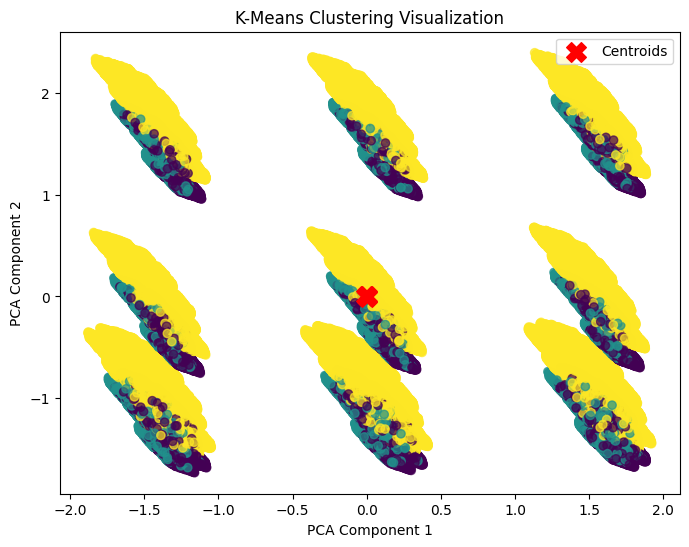

   id         Brand Material  Size  Compartments Laptop Compartment  \
0   0      Jansport  Leather     1           7.0                Yes   
1   1      Jansport   Canvas     2          10.0                Yes   
2   2  Under Armour  Leather     2           2.0                Yes   
3   3          Nike    Nylon     2           8.0                Yes   
4   4        Adidas   Canvas     1           1.0                Yes   

  Waterproof      Style  Color  Weight Capacity (kg)      Price  Cluster  
0         No       Tote  Black             11.611723  112.15875        2  
1        Yes  Messenger  Green             27.078537   68.88056        2  
2         No  Messenger    Red             16.643760   39.17320        2  
3         No  Messenger  Green             12.937220   80.60793        2  
4        Yes  Messenger  Green             17.749338   86.02312        2  


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA



# Separate numeric and categorical columns (excluding target 'Price')
numeric_columns = train.select_dtypes(include=['int64', 'float64']).drop(columns=['Price'], errors='ignore')
categorical_columns = train.select_dtypes(include=['object'])

# Label Encoding for Ordinal Column (Size)
label_encoder = LabelEncoder()
if 'Size' in train.columns:
    train['Size'] = label_encoder.fit_transform(train['Size'])  # Convert 'Size' into numeric
    categorical_columns = categorical_columns.drop(columns=['Size'])  # Remove 'Size' from categorical list

# One-Hot Encoding for remaining categorical columns
encoder = OneHotEncoder(drop='first', sparse=False)
encoded_categorical = encoder.fit_transform(categorical_columns)

# Convert encoded categorical data into a DataFrame
encoded_categorical_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(categorical_columns.columns))

# Merge numeric, ordinal, and encoded categorical data
final_data = pd.concat([numeric_columns, train[['Size']], encoded_categorical_df], axis=1)

# Standardize the data (important for K-Means)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(final_data)

# Apply K-Means
k = 3  # Choose the number of clusters
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

# Add cluster labels to the original dataset
train['Cluster'] = kmeans.labels_

# Save the clustered data
train.to_csv('clustered_data.csv', index=False)

# Visualize the clusters (reduce dimensions to 2D using PCA)
pca = PCA(n_components=2)
pca_transformed = pca.fit_transform(scaled_data)

plt.figure(figsize=(8, 6))
plt.scatter(pca_transformed[:, 0], pca_transformed[:, 1], c=kmeans.labels_, cmap='viridis', alpha=0.7)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Print the first few rows with cluster labels
print(train.head())